# VGG-16(Visual Geometry Group -16)

In [1]:
!git clone "https://github.com/NeenuFrancis/flowers_multiclass_CNN.git"


Cloning into 'flowers_multiclass_CNN'...
remote: Enumerating objects: 1151, done.
remote: Counting objects: 100% (480/480), done.
remote: Compressing objects: 100% (462/462), done.
remote: Total 1151 (delta 32), reused 429 (delta 16), pack-reused 671
Receiving objects: 100% (1151/1151), 55.05 MiB | 37.48 MiB/s, done.
Resolving deltas: 100% (57/57), done.


### Importing the libraries

In [42]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Flatten, Dense, Dropout

from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import tensorflow as tf

In [3]:
tf.__version__

'2.14.0'


## Part 1 - Data Preprocessing

###**Create an object for training and testing data.**

### Preprocessing the Training set

In [4]:
import pandas as pd

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/flowers_multiclass_CNN/data/train',
                                                 target_size = (224, 224))

Found 500 images belonging to 5 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/flowers_multiclass_CNN/data/test',
                                            target_size = (224, 224))

Found 419 images belonging to 5 classes.


## Part 2 - Building the VGG model

### Initialising the model

 Define the model as a sequential sequence of layers

In [7]:
vgg = Sequential()

### Step 1 - Convolution

2 x convolution layer of 64 channel of 3x3 kernel and same padding.

In [8]:
vgg.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

### Step 2 - Pooling

1 x maxpool layer of 2x2 pool size and stride 2x2.

In [9]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

### Adding convolutional layer

2 x convolution layer of 128 channel of 3x3 kernel and same padding.

In [10]:
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

### Adding pooling layer



In [11]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))





### Adding a convolutional layer

2 x convolution layer of 256 channel of 3x3 kernel and same padding.

In [44]:
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))



### Adding pooling layer


In [45]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


### Adding a convolutional layer

2 x convolution layer of 512 channel of 3x3 kernel and same padding.

In [46]:
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


### Adding pooling layer


In [47]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


### Adding a convolutional layer

2 x convolution layer of 512 channel of 3x3 kernel and same padding.

In [48]:
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))


### Adding pooling layer


In [49]:
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

### Step 3 - Flattening

In [50]:
vgg.add(Flatten())


### Step 4 - Full Connection

Pass  the data to the dense layer

In [51]:
vgg.add(Dense(units=4096,activation="relu"))
vgg.add(Dropout(0.5))
vgg.add(Dense(units=4096,activation="relu"))
vgg.add(Dropout(0.5))


### Step 5 - Output Layer






In [52]:
vgg.add(Dense(units=5, activation="softmax"))

## Part 3 - Training the model

### Compiling the model

In [53]:
vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

### Training the model on the Training set and evaluating it on the Test set

In [55]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')



In [85]:
#vgg.fit(steps_per_epoch=5,x=training_set, validation_data = test_set, validation_steps=10,epochs=3,callbacks=[checkpoint,early])
vgg.fit(x=training_set, validation_data = test_set, epochs=25)

Epoch 1/25
16/16 [==============================] - 11s 674ms/step - loss: 1.6100 - accuracy: 0.2140 - val_loss: 1.6090 - val_accuracy: 0.2339
Epoch 2/25
16/16 [==============================] - 11s 707ms/step - loss: 1.6092 - accuracy: 0.1960 - val_loss: 1.6085 - val_accuracy: 0.2339
Epoch 3/25
16/16 [==============================] - 12s 732ms/step - loss: 1.6104 - accuracy: 0.1760 - val_loss: 1.6079 - val_accuracy: 0.2363
Epoch 4/25
16/16 [==============================] - 10s 637ms/step - loss: 1.6097 - accuracy: 0.1820 - val_loss: 1.6093 - val_accuracy: 0.2339
Epoch 5/25
16/16 [==============================] - 11s 709ms/step - loss: 1.6101 - accuracy: 0.2040 - val_loss: 1.6089 - val_accuracy: 0.2363
Epoch 6/25
16/16 [==============================] - 11s 705ms/step - loss: 1.6098 - accuracy: 0.2040 - val_loss: 1.6114 - val_accuracy: 0.1671
Epoch 7/25
16/16 [==============================] - 11s 675ms/step - loss: 1.6103 - accuracy: 0.2040 - val_loss: 1.6113 - val_accuracy: 0.1241

## Part 4 - Making a single prediction


1/1 [==============================] - 0s 23ms/step
[[0.839271   0.01277285 0.06994646 0.07675334 0.00125633]]
{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
tulip


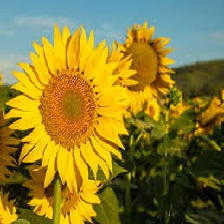

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.models import load_model


test_image = image.load_img('/content/flowers_multiclass_CNN/Predict_data/sunflower_1.jpg',
                            target_size = (224, 224))
im=test_image

test_image = np.expand_dims(test_image, axis = 0)

result = vgg.predict(test_image)
print(result)
print(training_set.class_indices)
label=["daisy", "dandelion", "rose", "sunflower", "tulip"]



for i in label:
    if result[0][label.index(i)]==1:
         break






prediction=i
im.show()



print(prediction)

display(im)